# Titanic: a Machine Learning Case Study

![](titanic_main.png)

by Dr. Kristian Rother

*This tutorial is available under the conditions of the Creative Commons Attribution Share-alike License 4.0*

## Goal

We would like to utilize passenger data to predict whether or not they will survive a trip on the Titanic.

## Part 1: Boarding

![](boarding.png)

### 1.1 Importing Python Libraries
Import a few Python libraries typically used in Machine Learning:

In [1]:
import pandas as pd  # handling of tabular data
import numpy as np   # number crunching
import pylab as plt  # plotting
import sklearn       # Machine Learning

In [2]:
%matplotlib inline

### 1.2. Load passenger data

Use `pandas` to load the file `train.csv`.

In [13]:
df = pd.read_csv(r'C:\Users\jon\git\ref_DataScienceRetreat\kaggle_titanic\data\train.csv')

You can find a detailed documentation of the dataset on [www.kaggle.com/c/titanic](https://www.kaggle.com/c/titanic).


### 1.3. Inspect the data

Show the contents of the pandas DataFrame.

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Challenge
Examine the distribution of values in two other columns of the dataset using the `value_counts()` function.

In [19]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [21]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

## Part 2: The Beauty of the Sea

![](journey.png)

### 2.1 Draw a histogram
Create a histogram grouping the passengers by age:

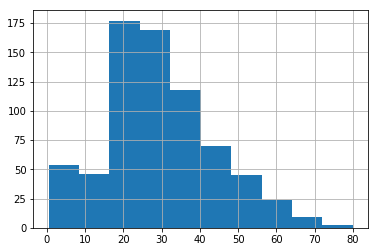

In [22]:
df['Age'].hist()

### Challenge
Explain the following line.

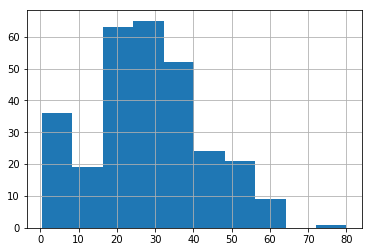

In [23]:
df[df['Survived']==1]['Age'].hist()
# Age of all survivors

### 2.2 Bar plot

Create a bar plot that groups the passenger class by survival:

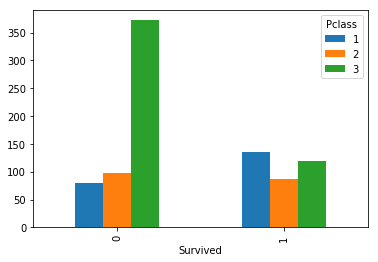

In [24]:
g = df.groupby(['Survived', 'Pclass'])
g = g['Name'].count()
g = g.unstack()
g.plot.bar()

### Challenge
Create another bar plot, this time group the bars by gender.

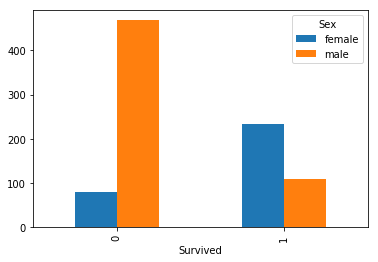

In [25]:
g = df.groupby(['Survived', 'Sex'])
g = g['Name'].count()
g = g.unstack()
g.plot.bar()

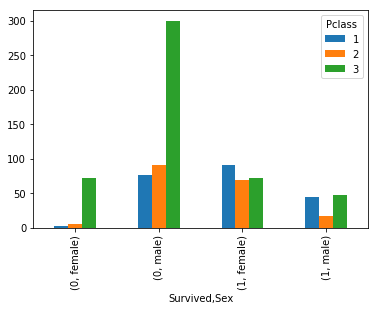

In [26]:
g = df.groupby(['Survived', 'Sex', 'Pclass'])
g = g['Name'].count()
g = g.unstack()
g.plot.bar()

### 2.3 Hypotheses
Collect ideas which **features** of passengers increase their chances of survival and which decrease them. Only after that start building a model.

In [27]:
# Class
# Gender
# Age

## Part 3: Collision Course
![](titanic.png)

## 3.1 Data wrangling
At this point we need to clean and reshape the data a bit.

* Remove all columns but `"Pclass", "Age", "Sex" and "Survived"`.
* Remove all lines containing missing data.
* Convert all **input features** to a matrix `X`.
* Convert the **target column** to an 1D-array `y`.

In [28]:
cleaned = df[['Pclass', 'Age', 'Sex', 'Survived']]
cleaned = cleaned.dropna()

In [29]:
X = cleaned[['Pclass', 'Age']]
X = X.values

y = cleaned[['Survived']]
y = y.values.ravel()

### Challenge
View the dataset as a table before and after the data wrangling step.

In [53]:
type(X)
print(X.shape)
print(y.shape)
#y

(714, 2)
(714,)


In [54]:
#this_df = pd.DataFrame()
#this_df
df = cleaned.groupby(['Survived','Pclass']).count()
df

Age  Sex
Survived Pclass          
0        1        64   64
         2        90   90
         3       270  270
1        1       122  122
         2        83   83
         3        85   85

### 3.2 Create a Training/Test set

Split the data into a training and a test set:

In [55]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)

In [57]:
Xtest.shape, Xtrain.shape

((179, 2), (535, 2))

### Question
* Why do we need to create a separate test set?

## Part 4: Modeling and Prediction
![](sinking.png)

### 4.1 Build a logistic regression model
Create a Machine Learning model using logistic regression and fit it with the training data:

In [59]:
from sklearn.linear_model import LogisticRegression

m = LogisticRegression()
m.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### 4.2 Evaluate the model

Calculate the accuracy of the model for the training data:

In [60]:
m.score(Xtrain, ytrain)

0.69719626168224302

With a *skewed dataset*, a confusion matrix is more robust:

In [61]:
from sklearn.metrics import confusion_matrix

ypred = m.predict(Xtrain)
confusion_matrix(ytrain, ypred)

array([[266,  51],
       [111, 107]], dtype=int64)

### Challenge
Calculate the accuracy for the test data as well. Explain the differences.

In [62]:
m.score(Xtest, ytest)

0.70949720670391059

### Question

Is this a good result? Why or why not?

### 4.3 More features
We will add more data to the prediction: gender. To use the data, we need to convert it to numbers using **one-hot encoding**. 

In [64]:
gender = pd.get_dummies(cleaned['Sex'])
gender.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


Of course, we need to add the column to the input table (one is enough).

In [68]:
cleaned['female'] = gender['female']
cleaned.head()

,Pclass,Age,Sex,Survived,female
0,3,22.0,male,0,0
1,1,38.0,female,1,1
2,3,26.0,female,1,1
3,1,35.0,female,1,1
4,3,35.0,male,0,0


### Challenge
Re-run the prediction above using the additional feature. How does the accuracy change?

### 4.4 Try a Random Forest Model

Let's try a different model: The Random Forest (an **ensemble of decision trees**)

In [98]:
from sklearn.ensemble import RandomForestClassifier

m = RandomForestClassifier()
m = RandomForestClassifier(max_depth=3)


### Challenge
Fit the Random Forest model to the training data yourself and evaluate it on the test set.

In [99]:
m.fit(Xtrain,ytrain)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [100]:
m.score(Xtrain,ytrain)

0.73644859813084107

In [101]:
m.score(Xtest,ytest)

0.67597765363128492

Compare how the following parameters affect prediction quality:

In [104]:
m1 = RandomForestClassifier(max_depth=2)
m2 = RandomForestClassifier(max_depth=3)
m3 = RandomForestClassifier(max_depth=10)

In [119]:
m1.fit(Xtrain,ytrain)
print(m1.score(Xtrain,ytrain))
print(m1.score(Xtest,ytest))

0.728971962617
0.68156424581


In [121]:
m2.fit(Xtrain,ytrain)
m2.score(Xtrain,ytrain)
# 0.698 on test set

0.7271028037383177

In [115]:
m3.fit(Xtrain,ytrain)
m3.score(Xtrain,ytrain)
# 0.6759 on test set|

0.79813084112149535

In [116]:
m3.score(Xtest,ytest)

0.68156424581005581

Limiting the complexity of a model is called **regularization**

In [117]:
m.score(Xtrain,ytrain)

0.73644859813084107

In [ ]:
m1 = RandomForestClassifier(max_depth=2)

## Part 5: Prediction

Create a data set for additional passengers and predict whether they will survive:

In [118]:
leo = np.array([[22, 3, 0]])
kate = np.array([[25, 1, 1]])

print(m.predict(leo))
print(m.predict(kate))

ValueError: Number of features of the model must match the input. Model n_features is 2 and input n_features is 3 

### Challenge
There is (at least) one error in the definition of the data for prediction. Can you find and fix it?